In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
df_Texas_Covid_case = pd.read_excel("../Texas COVID-19 Active Case Data by County.xlsx",header=2)

In [3]:
a = df_Texas_Covid_case.set_index('County')

In [4]:
a.index

Index(['Anderson', 'Andrews', 'Angelina', 'Aransas', 'Archer', 'Armstrong',
       'Atascosa', 'Austin', 'Bailey', 'Bandera',
       ...
       'Willacy', 'Williamson', 'Wilson', 'Winkler', 'Wise', 'Wood', 'Yoakum',
       'Young', 'Zapata', 'Zavala'],
      dtype='object', name='County', length=254)

In [5]:
b = a.sum(axis=0)

In [6]:
b

Active \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\nCases \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n4-7       7536
Active \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\nCases \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n4-8       8397
Active \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\nCases \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n4-9       8919
Active \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\nCases \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n4-10     10067
Active \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\nCases \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n4-11     10682
                                                                                          ...  
Active Cases 07-08                                                                       112362
Active Cases 07-09                                                                       118320
Active Cases 07-10                                                                       123398
Active Cases 07-11                                                                       131266
Active Cases 07-12                      

In [7]:
dated_dict = {}
count = 0
for x in b:
    month_temp = int(b.index[count][-5:].split('-')[0])
    day_temp = int(b.index[count][-5:].split('-')[1])
    dated_dict[datetime.datetime(2020, month_temp, day_temp)] = b[count]
    count += 1

In [8]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Active Cases'])

In [9]:
c = dated_df.set_index('Date')

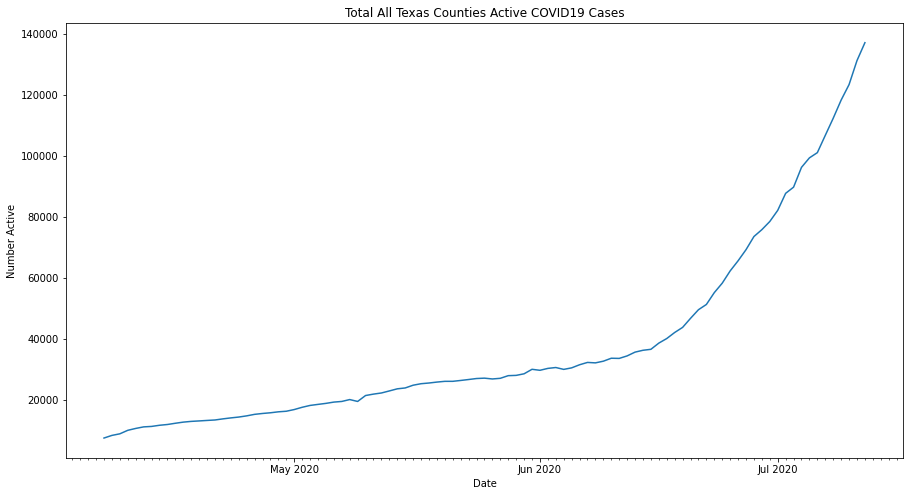

In [10]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Number Active',color='black')
plt.plot(c)
plt.title('Total All Texas Counties Active COVID19 Cases')
plt.savefig('TexasActive.png')

In [11]:
c

,Active Cases
Date,
2020-04-07,7536
2020-04-08,8397
2020-04-09,8919
2020-04-10,10067
2020-04-11,10682
...,...
2020-07-08,112362
2020-07-09,118320
2020-07-10,123398


In [12]:
x = c.diff(periods = 1)

In [13]:
for y in x.values:
    print(y)

[nan]
[861.]
[522.]
[1148.]
[615.]
[508.]
[151.]
[377.]
[254.]
[407.]
[371.]
[242.]
[151.]
[160.]
[150.]
[363.]
[320.]
[276.]
[392.]
[497.]
[286.]
[229.]
[313.]
[192.]
[552.]
[743.]
[607.]
[342.]
[333.]
[420.]
[211.]
[619.]
[-619.]
[1943.]
[463.]
[370.]
[670.]
[690.]
[287.]
[900.]
[491.]
[230.]
[307.]
[243.]
[3.]
[284.]
[309.]
[326.]
[119.]
[-262.]
[213.]
[866.]
[95.]
[518.]
[1473.]
[-325.]
[623.]
[289.]
[-613.]
[499.]
[1017.]
[764.]
[-145.]
[551.]
[967.]
[-55.]
[820.]
[1239.]
[608.]
[316.]
[2034.]
[1496.]
[1984.]
[1671.]
[2968.]
[2826.]
[1721.]
[3885.]
[3097.]
[4017.]
[3319.]
[3640.]
[4316.]
[2252.]
[2672.]
[3651.]
[5583.]
[2027.]
[6492.]
[3110.]
[1712.]
[5656.]
[5611.]
[5958.]
[5078.]
[7868.]
[5875.]


In [14]:
x.rename(columns={'Active Cases':'Change In Active Cases'}, inplace = True)

In [15]:
x_7day_moving= x.rolling(7).mean().shift()

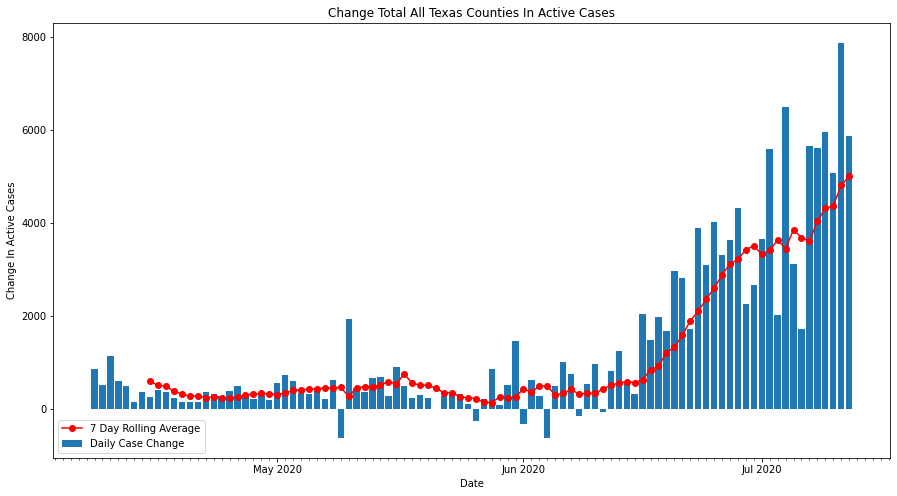

In [16]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Change In Active Cases',color='black')
plt.title('Change Total All Texas Counties In Active Cases')
plt.bar(x.index,x['Change In Active Cases'])
plt.plot(x_7day_moving, 'ro-')
plt.legend(['7 Day Rolling Average','Daily Case Change'])
fig.savefig('TexasChangeInActiveCases.png')